# Before you get started, run from Terminal
````
$ pip install quilt
$ quilt install akarve/genes_demo
```

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import quilt

%matplotlib inline

# Import package

In [2]:
%time from quilt.data.akarve import genes_demo as exps

CPU times: user 4.37 ms, sys: 1.82 ms, total: 6.19 ms
Wall time: 6.94 ms


In [3]:
exps

<GroupNode '/Users/karve/code/dsci/jupyter_demo/quilt_packages/akarve/genes_demo':''>
ADAM21P1
C17orf75
CCDC182
IER2
MIR1226
MIR651
MITD1
PRSS23
README
USF3

# Analysis
Join all of the experimental data on a common key (in this case 'gene id').

## Join data across all data frames on a common key

In [4]:
def easy_join():
    joined = None
    last_col = None
    # grab all data frames; skip README
    for k in [df for df in exps._data_keys() if df != 'README']:
        atbat = getattr(exps, k)()
        if type(joined) == type(None):
            joined = atbat
        else:
            joined = pd.merge(joined, atbat, how='inner', left_on='gene symbol', right_on='gene symbol')
    return joined
            
sjoin = easy_join()

In [5]:
sjoin

,HGNC ID_x,gene symbol,gene name_x,sample1ADAM21P1,sample2ADAM21P1,sample3ADAM21P1,sample4ADAM21P1,sample5ADAM21P1,HGNC ID_y,gene name_y,...,sample3PRSS23,sample4PRSS23,sample5PRSS23,HGNC ID,gene name_y,sample1USF3,sample2USF3,sample3USF3,sample4USF3,sample5USF3
0,HGNC:5,A1BG,alpha-1-B glycoprotein,18.226614,10.218157,4.712592,0.0,0.0,HGNC:5,alpha-1-B glycoprotein,...,4.294068,6.353882,6.907890,HGNC:5,alpha-1-B glycoprotein,8.107584,2.348380,4.826276,8.217087,10.536552
1,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,12.526714,1.042367,2.234951,0.0,0.0,HGNC:37133,A1BG antisense RNA 1,...,0.658593,1.537378,8.561236,HGNC:37133,A1BG antisense RNA 1,14.075460,4.913642,3.054802,8.188623,8.443657
2,HGNC:24086,A1CF,APOBEC1 complementation factor,8.133934,1.185602,1.312188,0.0,0.0,HGNC:24086,APOBEC1 complementation factor,...,2.009390,4.359867,7.048369,HGNC:24086,APOBEC1 complementation factor,17.642883,4.725431,2.094946,1.858233,11.716661
3,HGNC:7,A2M,alpha-2-macroglobulin,2.749890,5.970543,3.433607,0.0,0.0,HGNC:7,alpha-2-macroglobulin,...,3.589041,3.440111,0.013043,HGNC:7,alpha-2-macroglobulin,3.270010,0.997564,0.015878,0.224328,5.932335
4,HGNC:27057,A2M-AS1,A2M antisense RNA 1 (head to head),0.193079,13.274621,4.838645,0.0,0.0,HGNC:27057,A2M antisense RNA 1 (head to head),...,2.431798,4.626563,3.000255,HGNC:27057,A2M antisense RNA 1 (head to head),13.891928,4.010583,3.673571,2.628598,1.703692
5,HGNC:23336,A2ML1,alpha-2-macroglobulin like 1,14.195792,2.852422,0.135649,0.0,0.0,HGNC:23336,alpha-2-macroglobulin like 1,...,4.402969,1.069052,1.843583,HGNC:23336,alpha-2-macroglobulin like 1,4.530008,3.604510,3.172989,3.407681,6.430919
6,HGNC:41022,A2ML1-AS1,A2ML1 antisense RNA 1,18.346146,8.533391,4.024038,0.0,0.0,HGNC:41022,A2ML1 antisense RNA 1,...,0.968271,2.573110,6.765119,HGNC:41022,A2ML1 antisense RNA 1,10.857243,3.642393,2.129617,1.742583,10.500811
7,HGNC:41523,A2ML1-AS2,A2ML1 antisense RNA 2,1.024482,7.522366,0.290403,0.0,0.0,HGNC:41523,A2ML1 antisense RNA 2,...,3.694627,3.139327,3.575057,HGNC:41523,A2ML1 antisense RNA 2,15.386305,1.990624,4.366874,6.849539,2.617365
8,HGNC:8,A2MP1,alpha-2-macroglobulin pseudogene 1,10.791435,2.121101,2.809063,0.0,0.0,HGNC:8,alpha-2-macroglobulin pseudogene 1,...,4.141455,1.757433,3.095317,HGNC:8,alpha-2-macroglobulin pseudogene 1,14.372837,0.533250,1.058770,1.851123,1.335191
9,HGNC:30005,A3GALT2,"alpha 1,3-galactosyltransferase 2",5.630112,5.295359,2.953891,0.0,0.0,HGNC:30005,"alpha 1,3-galactosyltransferase 2",...,4.150293,3.134813,1.687085,HGNC:30005,"alpha 1,3-galactosyltransferase 2",1.518080,4.545595,2.461213,4.313604,8.835360


## Visualize

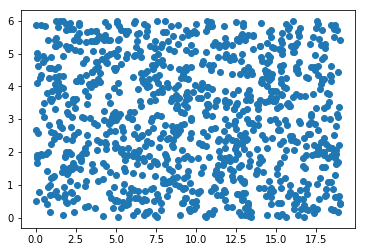

In [6]:
sample = sjoin.sample(1000) # this is random data; sample otherwise it will just be a solid block of dots
plt.scatter(sample['sample1ADAM21P1'], sample['sample1C17orf75'])